# Chapter9: Unsupervised Learning Techniques

- let the algorithm exploit the data without humans to lable it
- Most common unsupervised learning tasks and algorithms:
  - Dimensionality reduction
  - Clustering: customer segmentation, recommender system, image segmentation, data a
  - Anomaly detection: learn what normal look like and then detect defect instances
  - Density estimation: estimating __probability density function (PDF)__ of random process
    - used for anomaly detectionL instances located in __low-density regions__ are likely to be anomalies.
    
- Overview: 
  - Clustering: K-Ｍeans, DBSCAN,
  - Gaussian mixture models
  
# Set up

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Clustering: identify similar instances

Applications:
- Customer segmentation, recommender systems
- data analysis
- as a dimensionality reduction technique:
  - once data has been clustered, it is possible to measure each instance's __affinity__
  - instance's feature vector can be replaced by vector of __cluster affinities__
  - k clusters, then vector is k dimensionals
  - much lower dimensional than original feature vector
  
- for __anomaly detection (outlier detection)__
  - any instance has a low affinity to all the clusters is likely a anomaly.

- for semi-supervised learning
  - only have a few lables
  - perform clustering first then propagate the lables to all the instances in the same cluster
  - increase the lables for subsequent supervised learning
  
- For search engines
  - search pictures, just use the trained clustering model to find the image's clusters
  
- To segment an image
  - __clustering pixels according to the color__, then replacing each pixels's color with __mean color of its cluster, 
  - possible to reduce number of different colors in image
  - used in object detection and tracking
  - easier to detect contours of object

- Some algorithms look for instances centered around particular point -- __centroid__
  Some look for region of __densely packed instances__
  
 
## Introduction: Clustering vs Classification

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

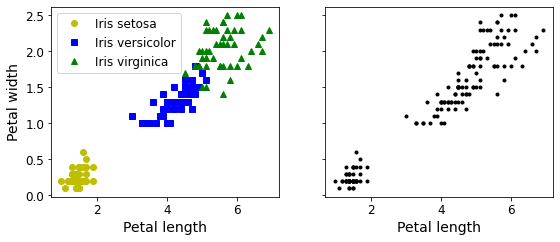

In [4]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

A Gaussian mixture model (explained below) can actually separate these clusters pretty well (using all 4 features: petal length & width, and sepal length & width).

In [5]:
from sklearn.mixture import GaussianMixture

In [6]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

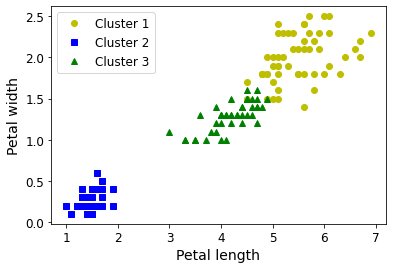

In [7]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [8]:
np.sum(y_pred==y)

0

In [9]:
np.sum(y_pred==y) / len(y_pred)

0.0

# K-Means
- suitable for bolbs(斑点）
- try to find each bolb's center and assign each instance to the closest blob

In [10]:
from sklearn.datasets import make_blobs

In [11]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [12]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

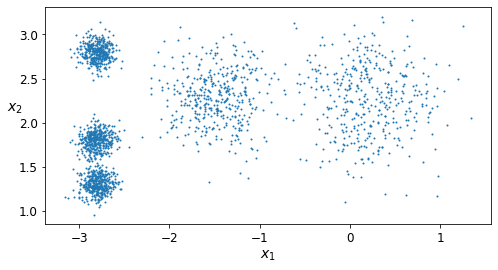

In [13]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plt.figure(figsize=(8, 4))
plot_clusters(X)

plt.show()

### Fit and Predict

train a K-Means clusterer on this dataset. It will try to find each blob's center and assign each instance to the closest blob:

In [14]:
from sklearn.cluster import KMeans

In [15]:
# need to specify number of clusters
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [16]:
y_pred

array([4, 1, 0, ..., 3, 0, 1], dtype=int32)

- each instances will be assigned to one of the clusters
- each instance's ___lable___ is the index of the cluster it was assigned to
- can see the lables via __lables_instance__ variable

In [17]:
y_pred is kmeans.labels_

True

In [18]:
#  5 centroids (i.e., cluster centers) were estimated:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

Note that the `KMeans` instance preserves the labels of the instances it was trained on. in this context, the _label_ of an instance is the index of the cluster that instance gets assigned to:

In [19]:
kmeans.labels_

array([4, 1, 0, ..., 3, 0, 1], dtype=int32)

In [20]:
# we can predict the labels of new instances:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 3, 3], dtype=int32)

### Decision Boundary for clusters

Voronoi tessellation diagram

In [21]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # contour([X, Y,] Z, [levels], **kwargs)
    # contour and contourf draw contour lines and filled contours, respectively. 
    # Except as noted, function signatures and return values are the same for both versions.
    # X, Y : array-like, optional. The coordinates of the values in Z.
    # Z : array-like(N, M) The height values over which the contour is drawn.
    # levels : int or array-like, optional
    # Determines the number and positions of the contour lines / regions.
    # If an int n, use n data intervals; i.e. draw n+1 contour lines. The level heights are automatically chosen.
    # If array-like, draw contour lines at the specified levels. The values must be in increasing order.
    # extent : (x0, x1, y0, y1), optional
    # If origin is not None, then extent is interpreted as in imshow: it gives the outer pixel boundaries
    
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

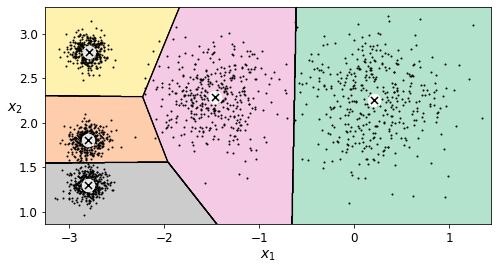

In [22]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

plt.show()

- Some of the instances ___near the edges___ were probably assigned to the wrong cluster, but overall it looks pretty good.

- the KMeans algorithm __does not behave very well__ when the blobs have very different diameters because all it cares about when assigning an instance to a cluster is the distance to the centroid.

### Hard Clustering vs Soft Clustering

- Hard Clustering: assign each instance to a single cluster
- Soft clustering: give each instance a __score__ per cluster
  - score can be distance between the instance to the centroid, __KMeans: transform() method__
  - or score can be affinity (simularity score), such as ___Gaussian Radial Basis Function___

In [23]:
# , it might be better measure the distance of each instance to all 5 centroids. 
kmeans.transform(X_new)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

You can verify that this is indeed the Euclidian distance between each instance and each centroid:

In [24]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

### The K-Means Algorithm
The K-Means algorithm is one of the fastest clustering algorithms, but also one of the simplest:

* First initialize __k__ centroids __randomly__: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
* Repeat until convergence (i.e., until the centroids stop moving):
    * Assign each instance to the closest centroid.
    * Update the centroids to be the mean of the instances that are assigned to them.

The `KMeans` class applies an optimized algorithm by default. To get the original K-Means algorithm (for educational purposes only), you must set `init="random"`, `n_init=1`and `algorithm="full"`. These hyperparameters will be explained below.

Let's run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:

In [25]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter4 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=4, random_state=1)


kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)
kmeans_iter4.fit(X)


KMeans(algorithm='full', copy_x=True, init='random', max_iter=4, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
       tol=0.0001, verbose=0)

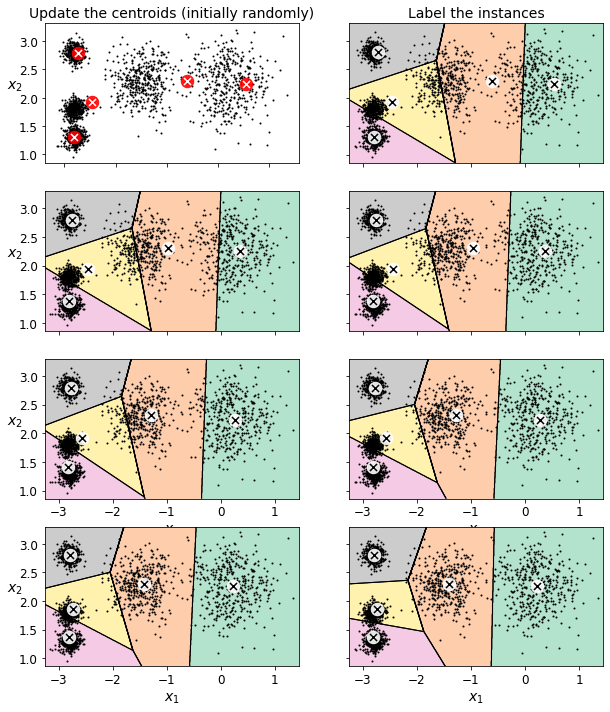

In [26]:
fig = plt.figure(figsize=(10, 18))

plt.subplot(621)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(622)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

# update the centroid to the second iteration
plt.subplot(623)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

# the new boundary established based on second iteration centers
plt.subplot(624)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

# third iteration centroids
plt.subplot(625)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(626)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

# 4 iteration centroids
plt.subplot(627)
plot_decision_boundaries(kmeans_iter3, X, show_centroids=False)
plot_centroids(kmeans_iter4.cluster_centers_)

plt.subplot(628)
plot_decision_boundaries(kmeans_iter4, X, show_ylabels=False)




plt.show()

### K-Means Variability

In the original K-Means algorithm, the centroids are just initialized randomly, and the algorithm simply runs a single iteration to gradually improve the centroids, as we saw above.

However, one major problem with this approach is that if you run K-Means multiple times (or __with different random seeds__), it can converge to very different solutions, resulting in __suboptimal solutions (converge to local minimum)__ as you can see below:

In [27]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

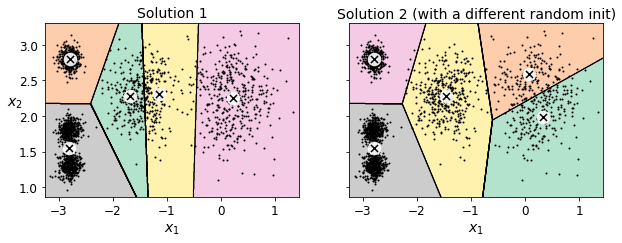

In [28]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=10)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=23)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

## Solutions to mitigate the risk by improving centroid initialization

### Centroid initialization method

#### 1. you know approximately where the centroid is:

set the __init__ hyperparameter to a NumPy array containing the list of centroids, and set __n_init__ to 1:

In [29]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans_with_good_init = KMeans(n_clusters=5, init=good_init, n_init=1)

#### 2. Inertia

To select the best model, we will need a way to evaluate a K-Mean model's __performance__. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can __`measure the distance between each instance and its centroid`__. This is the idea behind the _inertia_ metric:

- `inertia`: the mean squared distance between each instance and its closest centroid.
-  KMeans class runs the algorithm __n_init__ times and keeps the model with the lowest inertia. 

In [30]:
kmeans.inertia_

211.5985372581684

As you can easily verify, inertia is the __sum of the squared distances__ between each training instance and its closest centroid:

In [31]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816856

The `score()` method returns the negative inertia. Why negative? Well, it is because a predictor's `score()` method must always respect the "_great is better_" rule.

In [32]:
kmeans.score(X)

-211.59853725816856

### Multiple Initializations

So one approach to solve the variability issue is to simply run the K-Means algorithm multiple times with different random initializations, and select the solution that __minimizes the inertia__. For example, here are the inertias of the two "bad" models shown in the previous figure:

In [33]:
kmeans_rnd_init1.inertia_

236.80150429651766

In [34]:
kmeans_rnd_init2.inertia_

219.43588552955043

As you can see, they have a higher inertia than the first "good" model we trained, which means they are probably worse.

When you set the `n_init` hyperparameter, Scikit-Learn runs the original algorithm `n_init` times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets `n_init=10`.

In [35]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=11,
       tol=0.0001, verbose=0)

As you can see, we end up with the initial model, which is certainly the optimal K-Means solution (at least in terms of inertia)

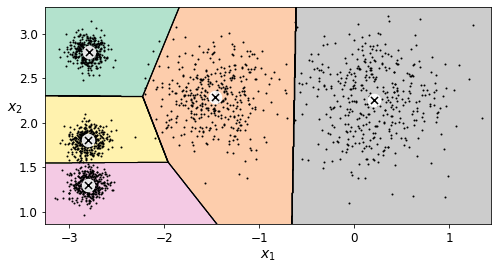

In [36]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

### K-Means++

Instead of initializing the centroids entirely randomly, it is preferable to initialize them using the following algorithm, proposed in a [2006 paper](https://goo.gl/eNUPw6) by David Arthur and Sergei Vassilvitskii:
* Take one centroid $c_1$, chosen uniformly at random from the dataset.
* Take a new center $c_i$, choosing an instance $\mathbf{x}_i$ with probability: $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ where $D(\mathbf{x}_i)$ is the distance between the instance $\mathbf{x}_i$ and the closest centroid that was already chosen. This probability distribution ensures that instances that are further away from already chosen centroids are much more likely be selected as centroids.
* Repeat the previous step until all $k$ centroids have been chosen.

The rest of the K-Means++ algorithm is just regular K-Means. With this initialization, the K-Means algorithm is much less likely to converge to a suboptimal solution, so it is possible to reduce `n_init` considerably. Most of the time, this largely compensates for the additional complexity of the initialization process.

To set the initialization to K-Means++, simply set `init="k-means++"` (this is actually the default):

In [37]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

### Accelerated K-Means

The K-Means algorithm can be significantly accelerated by `avoiding many unnecessary distance calculations`: this is achieved by exploiting the triangle inequality (given three points A, B and C, the distance AC is always such that AC ≤ AB + BC) and by keeping track of lower and upper bounds for distances between instances and centroids (see this [2003 paper](https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf) by Charles Elkan for more details).


To use Elkan's variant of K-Means, just set `algorithm="elkan"`. Note that it does not support sparse data, so by default, Scikit-Learn uses `"elkan"` for __dense data__, and `"full"` (the __regular__-Means algorithm) for sparse data.

In [39]:
%timeit -n 50 KMeans(algorithm="elkan").fit(X)

58.8 ms ± 873 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [40]:
%timeit -n 50 KMeans(algorithm="full").fit(X)

81 ms ± 966 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


### Mini-Batch K-Means

Scikit-Learn also implements a variant of the K-Means algorithm that supports mini-batches (see [this paper](http://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf)):

In [41]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [42]:
minibatch_kmeans.inertia_

211.93186531476775

#### If the dataset does not fit in memory

the simplest option is to use the `memmap` class, just like we did for incremental PCA in the previous chapter. First let's load MNIST:

In [43]:
import urllib
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

Next, let's write it to a `memmap`:

In [45]:
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

In [46]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

If your data is so large that you cannot use `memmap`, things get more complicated. Let's start by writing a function to load the next batch (in real life, you would load the data from disk):

In [47]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

Now we can train the model by feeding it __one batch at a time__. We also need to implement __multiple initializations__ and keep the model with the lowest inertia:

In [48]:
np.random.seed(42)

In [49]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [50]:
best_kmeans.score(X)

-211.70999744411483

### Mini-batch K-Means is much faster than regular K-Means:

In [51]:
%timeit KMeans(n_clusters=5).fit(X)

32.5 ms ± 699 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [52]:
%timeit MiniBatchKMeans(n_clusters=5).fit(X)

20.3 ms ± 642 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


That's *much* faster! 

However, its __performance is often lower__ (higher inertia), and it keeps degrading as _k_ increases. Let's plot the inertia ratio and the training time ratio between Mini-batch K-Means and regular K-Means:

In [53]:
from timeit import timeit

In [54]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

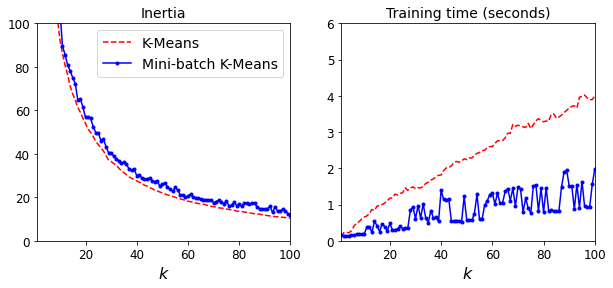

In [55]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])


plt.show()

## Finding the optimal number of clusters

What if the number of clusters was set to a lower or greater value than 5?

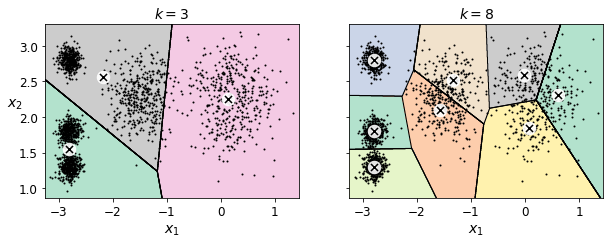

In [56]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")

plt.show()

In [57]:
kmeans_k3.inertia_

653.2167190021553

In [58]:
kmeans_k8.inertia_

118.41983763508077

we __cannot simply take the value of $k$ that minimizes the inertia__, since it keeps getting lower as we increase $k$. 
Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of $k$ and analyze the resulting curve:

- There is a inflexion(拐点) point called 'elbow'
- This is just a coarse approach.(粗略）

In [59]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

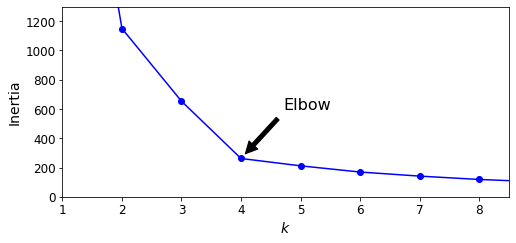

In [60]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])

plt.show()

As you can see, there is an elbow at $k=4$, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So $k=4$ is a pretty good choice. Of course in this example it is not perfect since it means that the two blobs in the lower left will be considered as just a single cluster, but it's a pretty good clustering nonetheless.

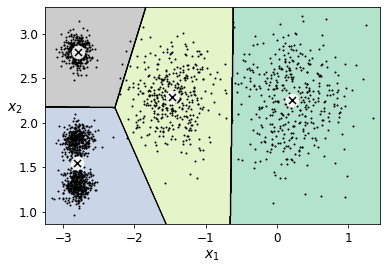

In [61]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

### silhouette score

- Another approach is to look at the __silhouette score__, which is the mean __silhouette coefficient__ over all the instances. 
- An instance's `silhouette coefficient` is equal to $(b - a)/\max(a, b)$ 
  - where $a$ is the mean distance to the other instances in the __same cluster__ (it is the _mean intra-cluster distance_),   - $b$ is the _mean nearest-cluster distance_, that is the mean distance to the instances of the __next closest cluster__ (defined as the one that minimizes $b$, excluding the instance's own cluster). 
  - The silhouette coefficient can vary between -1 and +1: 
    * a coefficient close to +1 means that the instance is `well inside its own cluster and far from other clusters`, 
    * a coefficient close to 0 means that it is close to a `cluster boundary`
    * a coefficient close to -1 means that the instance may have been assigned to the `wrong cluster`.
    
    
- Scikit-learn: `silhouette_score()` function

In [62]:
# Let's plot the silhouette score as a function of  𝑘 :
from sklearn.metrics import silhouette_score

In [63]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [64]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

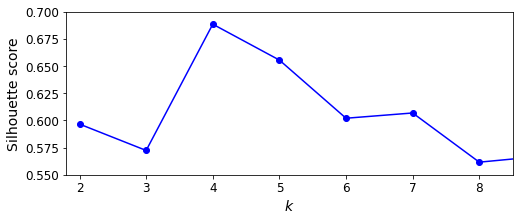

In [65]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])

plt.show()

### Silhouette diagram - a more informative visualization
- plot every instance's coefficient,  sorted by the cluster they are assigned to and by the value of the coefficient.
- each diagram: Knife shape per cluster
- Height: number of instances the cluster contains
- Width: the sorted silhouette coefficient of the instances in the cluster (wider, better)
- dashed line: mean silhouette coefficient -- the ___sihouette score___


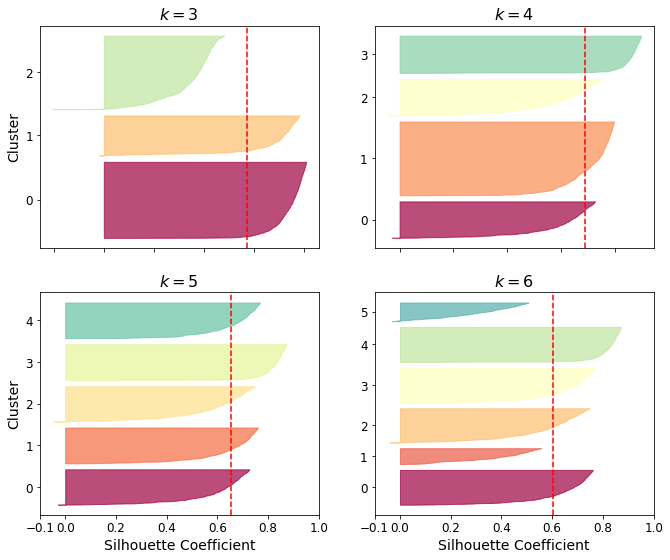

In [66]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

### Analyzing the sihouette diagrams for various values of k
如果大多数的instance都比dashed line(silhouette score）低，那么会非常不好，代表这些instance非常接近别的clusters
- k=3, 6:均存在全部的cluster的instance低于dashed line的现象
- k=4, t: 基本所有的instance都超越了dashed line,
- 对于k=4. 一号cluster非常大，k=5的所有cluster大小均匀，因此５很有可能是一个更好的结果

# Limits of K-Means　

- K-Means algorithm behaves badly when clusters have `varying sizes, densities or nonspherical shapes`
- Example: create a ellipsodial clusters data of different dimensions, densities and orientations

In [67]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

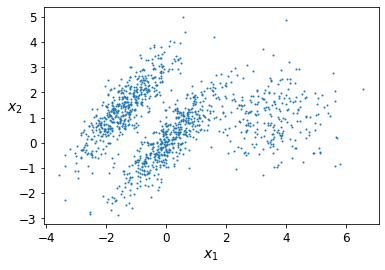

In [68]:
plot_clusters(X)

In [69]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

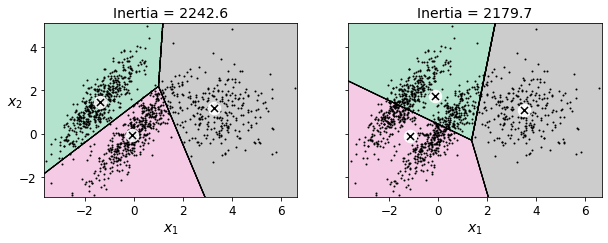

In [70]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

## Using Clustering for Image segmentation
https://blog.csdn.net/u012931582/article/details/70314859
- 语义分割(semantic segmentation): 给定一张图片,对图片中的每一个像素点进行分类
- 目标检测(object detection): 在一张图片中找到并用box标注出所有的目标.
注意,目标检测和目标识别不同之处在于,目标检测只有两类,目标和非目标.
- 目标识别(object recognition): 就是检测和用box标注出所有的物体,并标注类别.
- 实例分割(instance segmentation): 对图像中的每一个像素点进行分类,同种物体的不同实例也用不同的类标进行标注

英文解释：
- `Semantic segmentation`: all pixels that are part of the __same object type__ get assigned to the same segment
- `instance segmentation`: all pixels that are part of the same __individual object__ are assigned to the same segment
- `color segmentation`: assign pixels to the same segment if they have similar colors



In [71]:
# Download the ladybug image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x7f14ad3dc668>)

In [72]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape


(533, 800, 3)

- the image is represented in 3D array,height, width, color channel
- Cluster it using K-Means


In [73]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [74]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

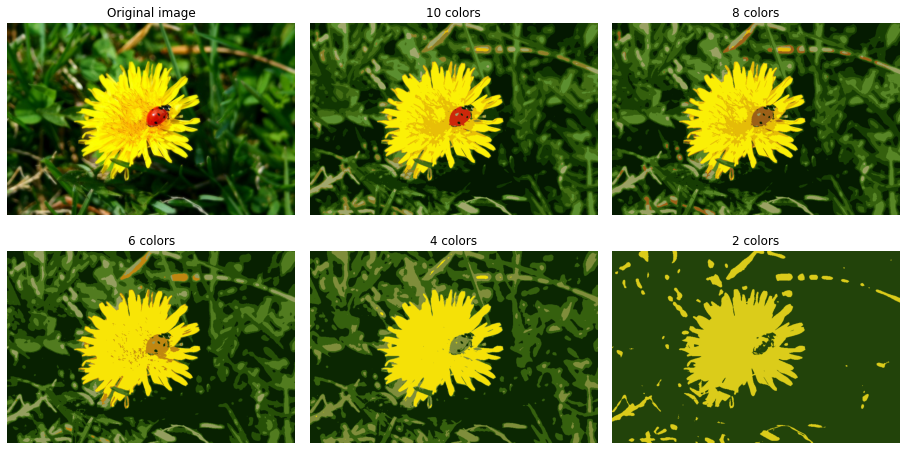

In [75]:
plt.figure(figsize=(16,8))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')


plt.show()

# Using Clustering for Preprocessing

- Clustering can be used for dimensionality reducion
- particularly, as a __preprocessing step__ before supervised leanring algorithm
- Example: tackle the digits dataset which is a simple MNIST-like dataset containing 1,797 grayscale 8×8 images representing digits 0 to 9.

In [76]:
from sklearn.datasets import load_digits

In [77]:
X_digits, y_digits = load_digits(return_X_y=True)

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

fit a Logistic Regression model and evaluate it on the test set:

In [80]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
log_reg.score(X_test, y_test)

0.9688888888888889

- 96.89% accuracy
- Let's see if we can do better by using K-Means as a preprocessing step. 
- We will create a pipeline that will first cluster the training set into 50 clusters and replace the images with their distances to the 50 clusters, then apply a logistic regression model:

In [82]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=5000,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [83]:
pipeline.score(X_test, y_test)

0.98

In [84]:
1 - (1 - 0.98) / (1 - 0.968888)

0.3571612239650296

We reduced the error rate by over 30%! But we chose the number of clusters $k$ completely arbitrarily, we can surely do better.

- Since K-Means is just a preprocessing step in a classification pipeline, finding a good value for $k$ is much simpler than earlier:
  - there's no need to perform silhouette analysis or minimize the inertia,
  - the best value of $k$ is simply the one that results in the best classification performance.
  - Use GridSearchCV to find the optimal number of clusters

In [85]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 34.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=42, tol=0.0001,
                                               verbose=0)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                      

#### Let's see what the __best number of clusters__ is:

In [86]:
grid_clf.best_params_

{'kmeans__n_clusters': 57}

In [87]:
grid_clf.score(X_test, y_test)

0.98

### Clustering for Semi-supervised Learning

- when we have plenty of unlabeled instances and very few labeled instances.
- Let's look at the performance of a logistic regression model when we only have 50 labeled instances:

In [88]:
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

It's much less than earlier of course. Let's see how we can do better. First, let's cluster the training set into 50 clusters, then for each cluster let's find the image ___closest to the centroid___. We will call these images the __representative images__:

In [89]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

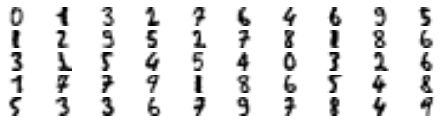

In [90]:
# plot these representitive images and lable them manually
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [91]:
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 2, 8, 6,
    3, 1, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

Now we have a dataset with just 50 labeled instances, but instead of being completely random instances, each of them is a representative image of its cluster. Let's see if the performance is any better:

In [92]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9177777777777778

We jumped from 83.3% accuracy to 92%, although we are still only training the model on 50 instances. Since it's often costly and painful to label instances, especially when it has to be done manually by experts, it's a good idea to make them label representative instances rather than just random instances.

- But perhaps we can go one step further: what if we propagated the labels to all the other instances in the same cluster?

In [93]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [94]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
log_reg.score(X_test, y_test)

0.9311111111111111

We got a tiny little accuracy boost. Better than nothing, but we should probably have propagated __`the labels only to the instances closest`__ to the centroid, because by propagating to the full cluster, we have certainly included some outliers. Let's only propagate the labels to the 20th percentile closest to the centroid:

In [96]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [97]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [98]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
log_reg.score(X_test, y_test)

0.8955555555555555

In [100]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.972318339100346

You could now do a few iterations of *active learning*:
1. Manually label the instances that the classifier is least sure about, if possible by picking them in distinct clusters.
2. Train a new model with these additional labels.

# DBSCAN

- This algorithm defines clusters as __`continous regions of high density`__
  
  * For each instance, the algorithm counts how many instances are located within a small distance $\epsilon$ from it
    The region is called __`epsilon_neighborhood`__
  
  * if an instance has at least ___min_smaples___ instances in its epsilon neighborhood, then it is a ___`core instances`___
    the core instances are located in dense region
  * All instances in the neighborhood of a core instance belong to the same cluster. A long sequence of neighboring core instances forms a single cluster
  * Any instance that is __not a core instance__ and does not have one in its neighborhood is considered an __`anomaly`__
  
- The algorithm works well if all clusters are dense enough. They are well separated by low-density regions.

- Example: Moons dataset

In [101]:
from sklearn.datasets import make_moons

In [102]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [103]:
from sklearn.cluster import DBSCAN

In [104]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [105]:
# the lables for all instances (which cluster they belongs to )
dbscan.labels_[:10]
# -1:anomalies

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [106]:
# indices of the core instances:
len(dbscan.core_sample_indices_)

808

In [107]:
# dbscan.core_sample_indices_

In [108]:
# The core instance are available in components_ instance variable
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [109]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# This is to show there are six clusters.
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [110]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [111]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

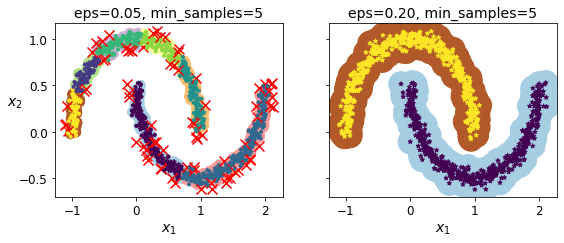

In [112]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()


In [113]:
dbscan = dbscan2

In [114]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [116]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [117]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

Plot the decision boundary,  since there's no __anomalies__ in the training set, 
the classifiers always chooses a cluster. even when they are far away.


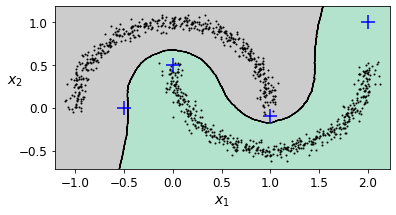

In [118]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)

plt.show()

If we introduce a __maximun distance__, when the instance are far away from both clusters, it is classified as __`anamolies`__
- use __kneighbors()__ mthod, to return the distances and indicess of k nearst neighbors in traning set

In [119]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

# Other Clustering Algorithms

## 1. Agglomerative clustering
- sklearn.cluster.AgglomerativeClustering
- 是一种自底而上(built from the bottom up)的层次聚类方法，它能够根据指定的相似度或距离定义计算出`类之间的距离`。（Hierarchical clustering两种方式的其中一种，另一种是divisive,自顶而下)
    - 1.将每一个元素单独定为一类
    - 2.重复：每一轮都合并指定距离(对指定距离的理解很重要)最小的类. at each iteration, agglomerative clustering connects the nearest pair of clusters
    - 3.直到所有的元素都归为同一类
- https://blog.csdn.net/lanchunhui/article/details/50877161
- https://blog.csdn.net/M1M1M16/article/details/79415871
- a __connectivity matrix__, which is a sparse m × m matrix that indicates which pairs ofinstances are neighbors (e.g., returned by `sklearn.neighbors.kneighbors_graph()`)



## 2. BIRCH (Balanced Iterative Reducing and Clustering using Hierachies)
- sklearn.cluster.Birch: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html
- 算法详细解释：　https://zhuanlan.zhihu.com/p/22458092
- 优势在于能够利用有限的内存资源完成对大数据集的高质量的聚类
- 通过构建聚类特征树（Clustering Feature Tree，简称CF Tree），在接下来的聚类过程中，直接对聚类特征进行聚类，而无需对原始数据集进行聚类
- 因此在多数情况下只需要扫描一次数据库即可进行聚类，IO成本与数据集尺寸呈线性关系。

## 3. Mean-shift
- sklearn.cluster.MeanShift: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html
- 算法详细解释：　https://www.cnblogs.com/liqizhou/archive/2012/05/12/2497220.html
-　先算出当前点的偏移均值,移动该点到其偏移均值,然后以此为新的起始点,继续移动,直到满足一定的条件结束.
-  shifts the circles in the direction of higher density, until each of them has found a local density maximum. 

## 4. Affinity propagation
- voting system, where instances vote for similar instances to be their representative
- Once converge, they form a cluster
- not good for large datasets

## 5. Spectral Clustering
- takes a __similarity matrix__ between the instances and creates a low-dimensional embedding from it (i.e., it reduces its dimensionality),
- then it uses another clustering algorithm in this low-dimensional space (ScikitLearn’s implementation uses K-Means.) 

# Gaussian Mixtures Model (GMM)

- a  __probabilistic model__ that assumes the instances were generated from a __mixture of several Gaussian distributions__ whoes parameters are unknown

- A single Gaussian distribution formed cluster looks like an `ellipsoid`

- the dataset X is assumed to have been generated through the following __probalistic process__:
    - For each instance, a cluster is picked randomly from k clusters
    - The __probability__ of choosing the j cluster is defined by cluster's weight. 
    - The __index__ of the cluster chosen for i instance is noted z(i)
    - If z(i)=j, meaning the i-th instance has been assigned to j-th cluster. 
    - Location x(i) of this instnace is sampled randomly from Gaussian distribution with __`mean`__ and __`covariance matrix`__ (the two __distribution parameters__)


- Scikit learn: __`GaussianMixture`__ class. Must know in advance the number __k__ of the gaussian distributions'
   - Given a known dataset X, estimating the weights $\phi$, and all distribution parameters


   

In [120]:
# make three bolbs with elliptical shape

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

Let's train a Gaussian mixture model on the previous dataset:

In [121]:
from sklearn.mixture import GaussianMixture

In [122]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

Let's look at the parameters that the algorithm estimated:

In [123]:
gm.weights_ # 每个cluster 所占的百分比

array([0.39032584, 0.20961444, 0.40005972])

In [124]:
gm.means_　# 每个cluster的mean，椭圆的圆心

array([[ 0.05145113,  0.07534576],
       [ 3.39947665,  1.05931088],
       [-1.40764129,  1.42712848]])

In [125]:
gm.covariances_

array([[[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]]])

In [126]:
gm.converged_

True

In [127]:
# Iterations take to converge
gm.n_iter_

4

You can now use the model to predict which cluster each instance belongs to (hard clustering) or the probabilities that it came from each cluster. For this, just use `predict()` method or the `predict_proba()` method

In [128]:
gm.predict(X)

array([0, 0, 2, ..., 1, 1, 1])

In [129]:
gm.predict_proba(X)

array([[9.76815996e-01, 2.31833274e-02, 6.76282339e-07],
       [9.82914418e-01, 1.64110061e-02, 6.74575575e-04],
       [7.52377580e-05, 1.99781831e-06, 9.99922764e-01],
       ...,
       [4.31902443e-07, 9.99999568e-01, 2.12540639e-26],
       [5.20915318e-16, 1.00000000e+00, 1.45002917e-41],
       [2.30971331e-15, 1.00000000e+00, 7.93266114e-41]])

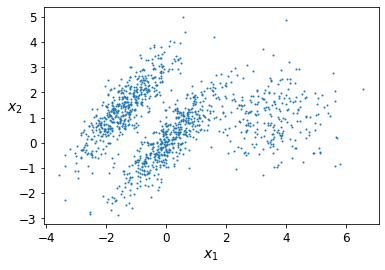

In [130]:
plot_clusters(X)

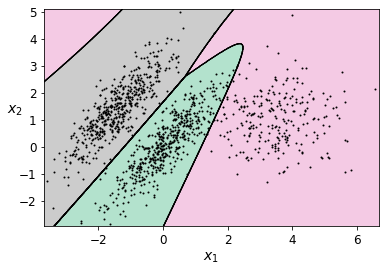

In [132]:
plot_decision_boundaries (gm,X, show_centroids = False)

This is a generative model, so you can sample new instances from it (and get their labels):

In [133]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.86951041, -0.32742378],
       [ 0.29854504,  0.28307991],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [-1.04030781,  0.78655831]])

In [134]:
y_new

array([0, 0, 1, 1, 1, 2])

Notice that they are sampled sequentially from each cluster.

You can also estimate the __log__ of the _`probability density` function_ (PDF) at any location using the `score_samples()` method:

___The greater score, the higher density of that location___

In [138]:
gm.score_samples(X)

array([-2.60786904, -3.57094519, -3.3302143 , ..., -3.51359636,
       -4.39793229, -3.80725953])

- Exponential of these scores, you get the value of PDF at the location of given instance
- These are not probabilities, but __probability density__(any positive value)
- To estimate the probabity that an instance will fall within a particular region, you should __integrate the PDF over that region__ 

- Let's check that the PDF integrates to 1 over the whole space.

We just take a large square around the clusters, and chop it into a grid of tiny squares, then we compute the approximate probability that the instances will be generated in each tiny square (by multiplying the PDF at one corner of the tiny square by the area of the square), and finally summing all these probabilities). The result is very close to 1:

In [139]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999225099

Now let's plot the resulting decision boundaries (dashed lines) and density contours:

In [140]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

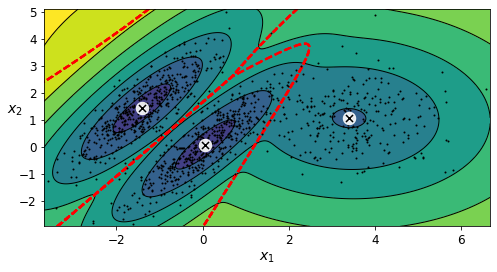

In [141]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()

### Imposing Constraint to EM(Expectation Maximization) Algorithm

You can impose constraints on the covariance matrices that the algorithm looks for by setting the __`covariance_type`__ hyperparameter:
* `"full"` (default): no constraint, all clusters can take on any ellipsoidal shape of any size.
* `"tied"`: all clusters must have the same shape, which can be any ellipsoid (i.e., they all share the same covariance matrix).
* `"spherical"`: all clusters must be spherical, but they can have different diameters (i.e., different variances).
* `"diag"`: clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the axes (i.e., the covariance matrices must be diagonal).

In [142]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [150]:
def compare_gaussian_mixtures(gm1, gm2, gm3, X):
    plt.figure(figsize=(15, 4))

    plt.subplot(131)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(132)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)
    
    plt.subplot(133)
    plot_gaussian_mixture(gm3, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm3.covariance_type), fontsize=14)


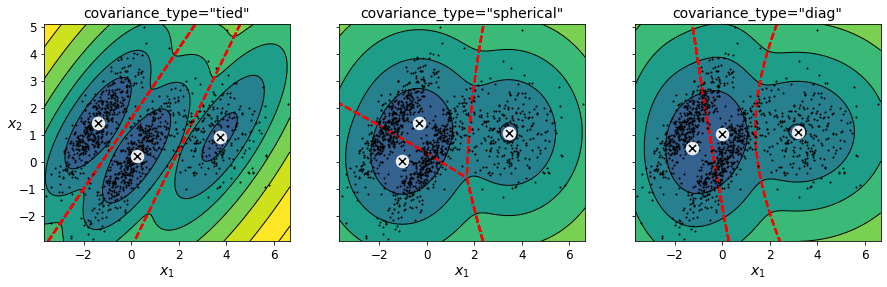

In [151]:
compare_gaussian_mixtures(gm_tied, gm_spherical, gm_diag, X)

plt.show()

# Anaomaly Detection Using Gaussian Mixtures

Gaussian Mixtures can be used for _anomaly detection_: 

- __`instances located in low-density regions can be considered anomalies.`__

- You must define what `density threshold` you want to use. 
    - If you get too many __false positives__ (good products classified as defective), the lower the threshold
    - If you get too many __false negatives__ (defective products classified as good products), increase the threshold
    - Precision/recall trade-off

For example, in a manufacturing company that tries to detect defective products, the ratio of defective products is usually well-known. Say it is equal to 4%, then you can set the density threshold to be the value that results in having 4% of the instances located in areas below that threshold density:



In [153]:
densities = gm.score_samples(X) # log of the probability density
# the four percentile lowest density
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

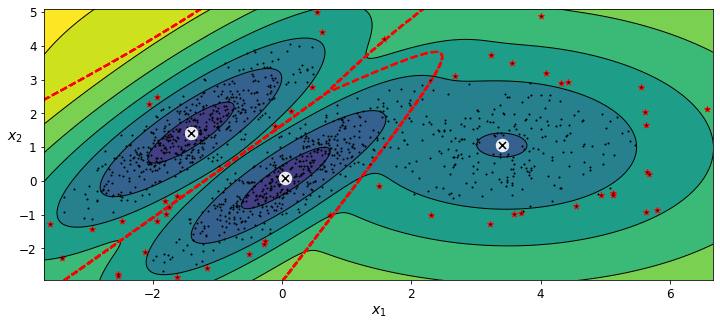

In [155]:
plt.figure(figsize=(12, 5))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

### Side note: 
- Gaussian Mixture try to fit all the data including the outliers
- if too many outliers, then this will biase the model's view of 'normality'
- Solution: fit the model once, and remove the oulier and fit the model again
- Alternative solution: Use Robust covariance estimation (__EllipticEnvelope__) class

# Model selction: selecting the number of clusters 

We cannot use the inertia or the silhouette score because they both assume that the clusters are spherical. Instead, we can try to find the model that minimizes a theoretical information criterion such as the `Byesian Information Criterion (BIC)` or Akaike Information Criterion (AIC):

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

* $m$ is the number of instances.
* $p$ is the number of parameters learned by the model.
* $\hat L$ is the ___`maximized value of the likelihood function`___ of the model. This is the conditional probability of the observed data $\mathbf{X}$, given the model and its ___optimized parameters___

Both BIC and AIC __penalize__ models that have more parameters to learn (e.g., more clusters), and reward models that fit the data well (i.e., models that give a high likelihood to the observed data).

In [156]:
gm.bic(X)

8189.733705221635

In [157]:
gm.aic(X)

8102.508425106597

In [158]:
# We could compute the BIC manually like this:
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood


In [159]:
n_params

17

There's one weight per cluster, but the sum must be equal to 1, so we have one degree of freedom less, hence the -1. Similarly, the degrees of freedom for an $n \times n$ covariance matrix is not $n^2$, but $1 + 2 + \dots + n = \dfrac{n (n+1)}{2}$.


Let's train Gaussian Mixture models with various values of $k$ and measure their BIC:




In [161]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [162]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

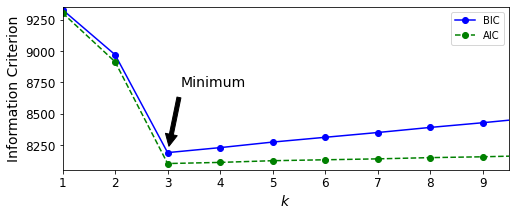

In [163]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()

plt.show()

Let's search for best combination of values for both the number of clusters and the __`covariance_type`__ hyperparameter:

In [164]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [165]:
best_k

3

In [166]:
best_covariance_type

'full'

## Variational Bayesian Gaussian Mixtures



Rather than manually searching for the optimal number of clusters, it is possible to use instead the __`BayesianGaussianMixture`__ class 
- which is capable of __giving weights equal (or close) to zero to unnecessary clusters__.
- Just set the number of components (`n_components`) to a value that you believe is greater than the optimal number of clusters, and the algorithm will eliminate the unnecessary clusters automatically.

In [167]:
from sklearn.mixture import BayesianGaussianMixture

In [172]:
bgm = BayesianGaussianMixture(n_components=15, n_init=12, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=15, n_init=12,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

In [173]:
# The algorithm automatically detected that only 3 components are needed
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  ])

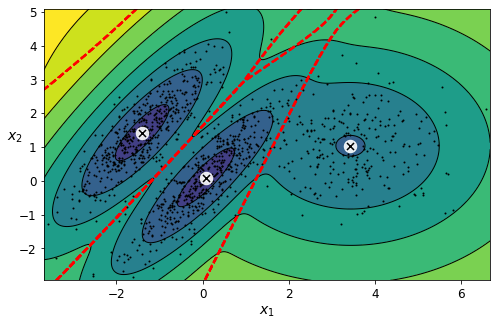

In [174]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

## Likelihood Function

In [175]:
from scipy.stats import norm

In [176]:
xx = np.linspace(-6, 4, 101)
ss = np.linspace(1, 2, 101)
XX, SS = np.meshgrid(xx, ss)
ZZ = 2 * norm.pdf(XX - 1.0, 0, SS) + norm.pdf(XX + 4.0, 0, SS)
ZZ = ZZ / ZZ.sum(axis=1)[:,np.newaxis] / (xx[1] - xx[0])

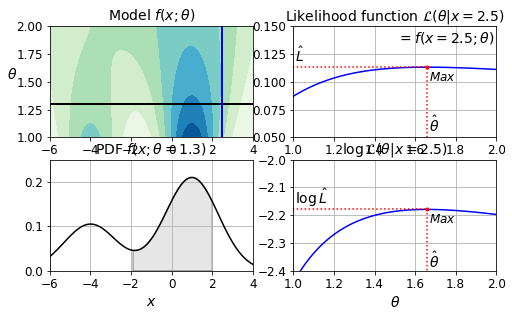

In [177]:
from matplotlib.patches import Polygon

plt.figure(figsize=(8, 4.5))

x_idx = 85
s_idx = 30

plt.subplot(221)
plt.contourf(XX, SS, ZZ, cmap="GnBu")
plt.plot([-6, 4], [ss[s_idx], ss[s_idx]], "k-", linewidth=2)
plt.plot([xx[x_idx], xx[x_idx]], [1, 2], "b-", linewidth=2)
plt.xlabel(r"$x$")
plt.ylabel(r"$\theta$", fontsize=14, rotation=0)
plt.title(r"Model $f(x; \theta)$", fontsize=14)

plt.subplot(222)
plt.plot(ss, ZZ[:, x_idx], "b-")
max_idx = np.argmax(ZZ[:, x_idx])
max_val = np.max(ZZ[:, x_idx])
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [0, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.text(1.01, max_val + 0.005, r"$\hat{L}$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, 0.055, r"$\hat{\theta}$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, max_val - 0.012, r"$Max$", fontsize=12)
plt.axis([1, 2, 0.05, 0.15])
plt.xlabel(r"$\theta$", fontsize=14)
plt.grid(True)
plt.text(1.99, 0.135, r"$=f(x=2.5; \theta)$", fontsize=14, ha="right")
plt.title(r"Likelihood function $\mathcal{L}(\theta|x=2.5)$", fontsize=14)

plt.subplot(223)
plt.plot(xx, ZZ[s_idx], "k-")
plt.axis([-6, 4, 0, 0.25])
plt.xlabel(r"$x$", fontsize=14)
plt.grid(True)
plt.title(r"PDF $f(x; \theta=1.3)$", fontsize=14)
verts = [(xx[41], 0)] + list(zip(xx[41:81], ZZ[s_idx, 41:81])) + [(xx[80], 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
plt.gca().add_patch(poly)

plt.subplot(224)
plt.plot(ss, np.log(ZZ[:, x_idx]), "b-")
max_idx = np.argmax(np.log(ZZ[:, x_idx]))
max_val = np.max(np.log(ZZ[:, x_idx]))
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [-5, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.axis([1, 2, -2.4, -2])
plt.xlabel(r"$\theta$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, max_val - 0.05, r"$Max$", fontsize=12)
plt.text(ss[max_idx]+ 0.01, -2.39, r"$\hat{\theta}$", fontsize=14)
plt.text(1.01, max_val + 0.02, r"$\log \, \hat{L}$", fontsize=14)
plt.grid(True)
plt.title(r"$\log \, \mathcal{L}(\theta|x=2.5)$", fontsize=14)


plt.show()

### 1. Beta distribution: commonly used to model random variables whose values lie within a fixed range

### 2. Stick-breaking Process (SBP): a good model for datasets where new instances are more likely to join large clusteres
- If concentration is high, then weight value will be low (close to zero)
- If concentration is low, then weight value is high. close to 1

### 3. Wishart distribution: is used to sample covariance matrices: the parameters d and V control the distribution of cluster shapes

### 4. Prior knowledge about latent variable z: encoded in probability distribution called ___prior___
- the prior belief about the number of clusters can be adjusted using __`weight_concentration_prior`__ hyperparameter
- More data, less prior matter. 

In [178]:
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=0.01, random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=10000, random_state=42)
nn = 73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=1000, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=1,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=10000,
                        weight_concentration_prior_type='dirichlet_process')

In [179]:
np.round(bgm_low.weights_, 2)

array([0.49, 0.51, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [180]:
np.round(bgm_high.weights_, 2)

array([0.43, 0.01, 0.01, 0.11, 0.01, 0.01, 0.01, 0.37, 0.01, 0.01])

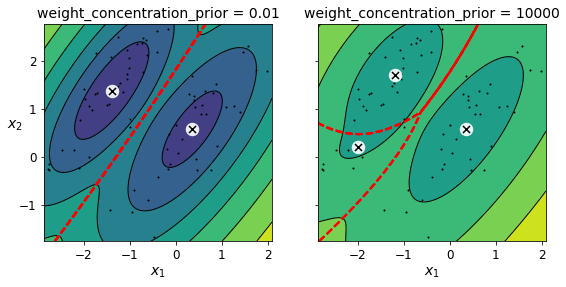

In [181]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)

plt.show()

## Gaussian mixture models: behaves badly if fit a dataset with different shapes.
- Gaussian mixture model only suitable for __ellipsoids__

In [182]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [183]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=10,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

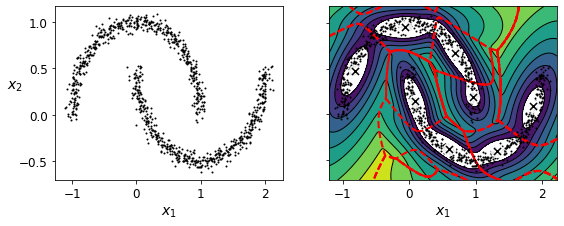

In [184]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)


plt.show()

instead of detecting 2 moon-shaped clusters, the algorithm detected 8 ellipsoidal clusters. However, the density plot does not look too bad, so it might be usable for anomaly detection.

# Other Algorithm for anomaly and novelty detection

## PCA(also, the other dimentionality reduction technique that has an __inverse_transform__ method)
If you compare the __reconstruction error__ of a normal instance with the
reconstruction error of an anomaly, the latter will usually be much larger.
This is a simple and often quite efficient anomaly detection approach (see
this chapter’s exercises for an application of this approach)

## Fast-MCD (minimum covariance determinant)
- Implemented by __EllipticEnvelope__ class, for outlier detection, in particular to clean up the dataset
- It assume the inlier instances are generated from __single__ Gaussian distribution (a single ellitic)
- it ignore the instances that are most likely outliers


## Isolation Forest
- for outlier detection, especially in high-dimensional datasets
- builds a random forest. each decision tree grows randomly
- At each node, it picks a feature randomly, picks a random threshold to split the data into two
- the dataset gradually gets chooped into pieces, until all instacnes end up isolated from the other
- Anomalies are usually far from other instances.
- So anomalies tends to get isolated in fewer steps than normal instances


## Local Outlier Factor (LOF)
- good for outlier detction
-  compares the density of instances around a given instance to the density around its neighbors. An anomaly is often more isolated than its k nearest neighbors.


## One-class SVM
- for novelty detection (the algorithm is assumed to be trained on a “clean” dataset, uncontaminated by outliers, whereas anomaly detection does not make this assumption)
- tries to separate the instances in high-dimensional space from the origin
- In the original space, this will correspond to finding a small region that encompasses all the instances.
- If a new instance does not fall within this region, it is an anomaly. 